In [1]:
import json
import pandas as pd
from datetime import datetime as dt
from datetime import datetime, timedelta
import time
import csv
import statsmodels.api as sm
import os
import numpy as np
import math
import requests


In [2]:
df=pd.read_csv('final_trades.csv')
df=df.drop('Unnamed: 0', axis=1)
df

,pair,price,time,trader,position_side,fee,volume,token_amount,price_into_token_amount,side,ts
0,wETH,3775.12000,2021-09-01 21:44:58+00:00,0xff03b9cc5449f8d9ac70df9f88870b9a87a4aeb4,LONG,0.114256,114.256339,0.006000,22.650720,open,1630532698
1,wETH,3300.49000,2021-09-11 12:03:42+00:00,0x32ae17db5157cc331993376fb3ef977d28f2f158,LONG,0.065694,65.693575,0.010000,33.004900,open,1631361822
2,wETH,3286.75517,2021-09-12 02:29:02+00:00,0x076edc63cd403a0b7986f0647b7d95a0b389cb92,LONG,1.506707,1506.706587,0.230000,755.953689,open,1631413742
3,wETH,3336.99000,2021-09-12 06:14:08+00:00,0xd2776d0d1c161244667d6c58d527b927c5519c5c,LONG,0.667398,667.398000,0.100658,335.895396,open,1631427248
4,wETH,3336.99000,2021-09-12 06:15:07+00:00,0xd2776d0d1c161244667d6c58d527b927c5519c5c,LONG,1.996008,1996.007984,0.299641,999.899130,open,1631427307
...,...,...,...,...,...,...,...,...,...,...,...
28881,wETH,1848.44000,2023-07-25 00:57:17+00:00,0x5fc79d77b8c3e207cd62f7ab424a6ef5a03488ac,LONG,252.021901,252021.901430,13.503305,24960.049897,open,1690246637
28882,UNI,5.80700,2023-07-25 02:38:23+00:00,0xe0c2e7b4267b1656add89520105faf63e66d4c05,SHORT,35.006817,32244.911964,172.205958,1000.000000,open,1690252703
28883,UNI,5.76900,2023-07-25 03:50:17+00:00,0xe0c2e7b4267b1656add89520105faf63e66d4c05,LONG,80.263279,79863.959583,360.740211,2081.110280,close,1690257017
28884,LINK,7.51700,2023-07-25 06:41:11+00:00,0x03b974abcc144061eef8ed8202caed448a4abe1a,LONG,96.334661,79681.274900,2764.009478,20777.059249,close,1690267271


In [3]:
df['pos'] = [1 if x =='LONG' else -1 for x in df['position_side']]
df

,pair,price,time,trader,position_side,fee,volume,token_amount,price_into_token_amount,side,ts,pos
0,wETH,3775.12000,2021-09-01 21:44:58+00:00,0xff03b9cc5449f8d9ac70df9f88870b9a87a4aeb4,LONG,0.114256,114.256339,0.006000,22.650720,open,1630532698,1
1,wETH,3300.49000,2021-09-11 12:03:42+00:00,0x32ae17db5157cc331993376fb3ef977d28f2f158,LONG,0.065694,65.693575,0.010000,33.004900,open,1631361822,1
2,wETH,3286.75517,2021-09-12 02:29:02+00:00,0x076edc63cd403a0b7986f0647b7d95a0b389cb92,LONG,1.506707,1506.706587,0.230000,755.953689,open,1631413742,1
3,wETH,3336.99000,2021-09-12 06:14:08+00:00,0xd2776d0d1c161244667d6c58d527b927c5519c5c,LONG,0.667398,667.398000,0.100658,335.895396,open,1631427248,1
4,wETH,3336.99000,2021-09-12 06:15:07+00:00,0xd2776d0d1c161244667d6c58d527b927c5519c5c,LONG,1.996008,1996.007984,0.299641,999.899130,open,1631427307,1
...,...,...,...,...,...,...,...,...,...,...,...,...
28881,wETH,1848.44000,2023-07-25 00:57:17+00:00,0x5fc79d77b8c3e207cd62f7ab424a6ef5a03488ac,LONG,252.021901,252021.901430,13.503305,24960.049897,open,1690246637,1
28882,UNI,5.80700,2023-07-25 02:38:23+00:00,0xe0c2e7b4267b1656add89520105faf63e66d4c05,SHORT,35.006817,32244.911964,172.205958,1000.000000,open,1690252703,-1
28883,UNI,5.76900,2023-07-25 03:50:17+00:00,0xe0c2e7b4267b1656add89520105faf63e66d4c05,LONG,80.263279,79863.959583,360.740211,2081.110280,close,1690257017,1
28884,LINK,7.51700,2023-07-25 06:41:11+00:00,0x03b974abcc144061eef8ed8202caed448a4abe1a,LONG,96.334661,79681.274900,2764.009478,20777.059249,close,1690267271,1


In [4]:
groups = df.groupby(['trader', 'pair'])
groups
df1=pd.DataFrame()
pnls=[]
traders=[]
assets=[]
qtys=[]
prices=[]
for name, group in groups:
    #name is Asset + Trader
    #group is all the trades that this name undertook 
    bv=0
    sv=0
    bq=0
    sq=0
    group=group.reset_index(drop=True)
    for i in group.index:
        #i is the ith trade that a particular trader took in an asset
        #LONG
        if group['pos'][i]==1:
            bv+=group['price_into_token_amount'][i]
            bq+= group['token_amount'][i]
        #SHORT
        else:
            sv+=group['price_into_token_amount'][i]
            sq+=  group['token_amount'][i]
    
    print(bv, sv, bq, sq)
    abp=0
    if bq!=0:
        abp=bv/bq
    asp=0
    if sq!=0:
        asp=sv/sq
    q=min(sq, bq)
    pnl=(asp*q)-(abp*q)
    net=bq-sq
    if net>0:
        price=abp
    else:
        price=asp
    traders.append(name[0])
    assets.append(name[1])
    pnls.append(pnl)
    qtys.append(net)
    prices.append(price)
df1['trader']=traders
df1['Asset']=assets
df1['PnL']=pnls
df1['Net Position Left']=qtys
df1['Average Price for Pos']=prices
df1

61963.802459 55000.0 8056.045708899368 6967.394143727539
412882.11651610426 386941.2737851343 14.793936083463773 13.749011520754214
2458102.485205281 2596238.335884832 1337.5833180119744 1406.42991207968
1701410.4714580139 1669415.8843222184 921.9499767767442 900.1488523301326
886945.3560045062 890204.2361031169 475.8015357497461 475.9100691429002
17952.84406386 16654.512471999158 2725.976893330826 2599.735053186635
46616.594768732655 44067.812502164474 8476.98363026755 8164.462455437148
633623.6361242863 695859.2830914017 21.31672918569969 23.22737085265978
486889.4674547519 572547.7823006613 284.5537885163569 333.6802979408662
0 5361.965539 0 0.2267887128959946
816715.2260204455 847725.375876 505.16658873195627 512.4909924137204
45855.07787118645 42057.407606174136 1.7590598667840436 1.5094348523199546
217797.67399767542 196135.6584629738 119.98074319107805 105.86693355096939
121183.4124275562 140023.53759 5.26052451 6.105896559251305
166065.59935684648 473228.732143 103.326429835723

11932179.096599834 49714569.05698299 8982.925277026661 40038.9077671662
108917.13437646955 114422.54306386634 4.908100903041194 5.2142110554651895
809171.2050806789 848308.8123625816 525.1611576497371 546.3372515028517
1194.2882595 3598.976037246309 233.85319355786177 619.9786455204667
4224279.379846072 3976980.3863767874 194.30636870125653 175.3597387355416
1362324.902348694 1344774.0199375509 837.6693593665415 792.0625854161967
6884.340290290602 5382.537211523712 1182.1610914266 921.2812823389472
938612.3523308034 892560.7244809797 54.62077835803828 51.06324721542426
1240791.5223265593 1068516.874173211 982.996199193232 840.3936325684143
15164.074974000001 21202.693977208753 8.47744600201603 11.886638386858207
3454.9318944767238 0 430.92361785850954 0
149362.44849410147 160271.51756169228 23661.51947023452 27268.647402141676
43805.92352643362 37820.21474342867 1.76797741 1.4149138099999998
221511.26139162126 410920.616026304 135.36545380907089 244.83981222305042
459.1499860835563 511

,trader,Asset,PnL,Net Position Left,Average Price for Pos
0,0x03b974abcc144061eef8ed8202caed448a4abe1a,LINK,1409.659282,1088.651565,7.691590
1,0x03b974abcc144061eef8ed8202caed448a4abe1a,wBTC,3221.826529,1.044925,27908.875244
2,0x03b974abcc144061eef8ed8202caed448a4abe1a,wETH,11046.569317,-68.846594,1845.977758
3,0x076edc63cd403a0b7986f0647b7d95a0b389cb92,wETH,8238.248004,21.801124,1845.447708
4,0x099721e781292e892551d2e458e90f9b248faedd,wETH,3055.865091,-0.108533,1870.530367
...,...,...,...,...,...
332,0xfbc82f77840011f845e30ea611ac53fa9f1e3685,wETH,-3233.072478,12.269020,1583.842445
333,0xff03b9cc5449f8d9ac70df9f88870b9a87a4aeb4,LINK,6630.570027,1300.369878,25.842044
334,0xff03b9cc5449f8d9ac70df9f88870b9a87a4aeb4,UNI,-11069.231117,2280.393163,20.931639
335,0xff03b9cc5449f8d9ac70df9f88870b9a87a4aeb4,wBTC,-5.820207,-0.003811,53647.907003


In [6]:
# pd.set_option('display.max_rows', None)  # or 1000
df1['Net Position Left']=round(df1['Net Position Left'], 2)
df1['Average Price for Pos']=round(df1['Average Price for Pos'], 2)
df1['PnL']=round(df1['PnL'], 3)
df1

,trader,Asset,PnL,Net Position Left,Average Price for Pos
0,0x03b974abcc144061eef8ed8202caed448a4abe1a,LINK,1409.659,1088.65,7.69
1,0x03b974abcc144061eef8ed8202caed448a4abe1a,wBTC,3221.827,1.04,27908.88
2,0x03b974abcc144061eef8ed8202caed448a4abe1a,wETH,11046.569,-68.85,1845.98
3,0x076edc63cd403a0b7986f0647b7d95a0b389cb92,wETH,8238.248,21.80,1845.45
4,0x099721e781292e892551d2e458e90f9b248faedd,wETH,3055.865,-0.11,1870.53
...,...,...,...,...,...
332,0xfbc82f77840011f845e30ea611ac53fa9f1e3685,wETH,-3233.072,12.27,1583.84
333,0xff03b9cc5449f8d9ac70df9f88870b9a87a4aeb4,LINK,6630.570,1300.37,25.84
334,0xff03b9cc5449f8d9ac70df9f88870b9a87a4aeb4,UNI,-11069.231,2280.39,20.93
335,0xff03b9cc5449f8d9ac70df9f88870b9a87a4aeb4,wBTC,-5.820,-0.00,53647.91


In [7]:
df1['PnL'].describe()

count    3.370000e+02
mean     7.137864e+03
std      8.287618e+04
min     -7.784718e+05
25%     -1.620200e+01
50%      1.629240e+02
75%      3.191924e+03
max      1.113539e+06
Name: PnL, dtype: float64

<AxesSubplot:>

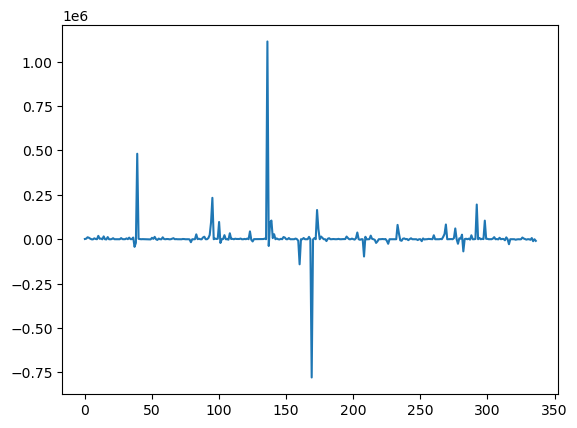

In [8]:
df1['PnL'].plot()